In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
#plt.switch_backend('agg')
#plt.plot([1,2,3,4])
#plt.ylabel('numbers')
#plt.show()
import os
import librosa
import pickle
import numpy as np
import librosa.display

timeText="1803230530"#"1803220742"#1803220502"

y,sr = librosa.load("./dataset/test_audio/audio_steel_140.wav",sr= 16000)
print(len(y),sr)
stft_y = librosa.stft(y,n_fft= 512, hop_length = 80, win_length=400)
print(stft_y.shape)
print(stft_y)
D = librosa.amplitude_to_db(stft_y,ref=np.max)
CQT = librosa.amplitude_to_db(librosa.cqt(y, sr=sr), ref=np.max)
librosa.display.specshow(stft_y,y_axis='linear', x_axis='time')
plt.title('Power spectrogram-1')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()
print("label")

for i in range(1,13,1):
    print("./output_test/"+timeText+"_"+str(i)+"_accel_plastic_13.wav")
    y2,sr = librosa.load("./output_test/"+timeText+"_"+str(i)+"_accel_plastic_13.wav",sr=16000)
    y2 = np.expm1(y2)
    print(len(y2))
    print(y2)
    print(sr)
    D = librosa.amplitude_to_db(librosa.stft(y2,n_fft = 512,hop_length = 80, win_length=400),ref=np.max)
    stft_y2 = librosa.stft(y2, n_fft = 512,hop_length = 80, win_length=400)

    CQT = librosa.amplitude_to_db(librosa.cqt(y2, sr=sr), ref=np.max)
    librosa.display.specshow(stft_y2,y_axis='linear', x_axis='time',sr=16000,hop_length=80)
    plt.title('Power spectrogram-1')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.show()

    print("Loss :", np.sum(np.power(y2-y,2))/8000.0)
    print(np.sum((np.absolute(stft_y-stft_y2))/(101.0 * 257.0)))


print(np.sum((np.absolute(stft_y-stft_y2))/(101.0 * 257.0)))
y2,sr2 = librosa.load("./dataset/test_audio/audio_steel_140.wav",sr= 16000)
print(np.sum((np.absolute(y2-y)))/8000.0)

print("First : ", np.sum(np.absolute(stft_y)))
print("Second : ",np.sum(np.absolute(stft_y2)))
print("Diff : ", np.sum(np.absolute(stft_y))-np.sum(np.absolute(stft_y2)))


FileNotFoundError: [Errno 2] No such file or directory: '/home/dxplaboratory/Haptic2AudioRNN/dataset/test_audio/audio_steel_140.wav'

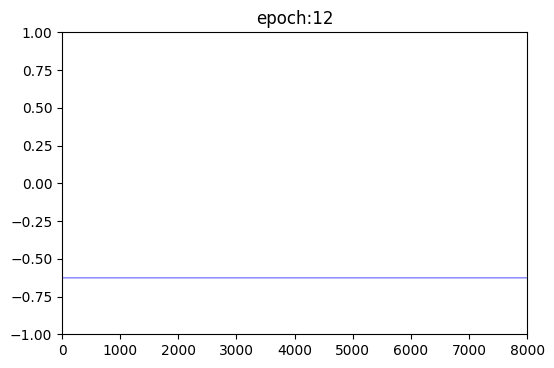

Loss : 0.393797119140625
16000
[-0.6015625  -0.6260376  -0.62667847 ... -0.62667847 -0.62667847
 -0.62667847]
7.8905956e-08
-0.6015625
-0.62667847
-0.6266747
Loss : 0.393797119140625


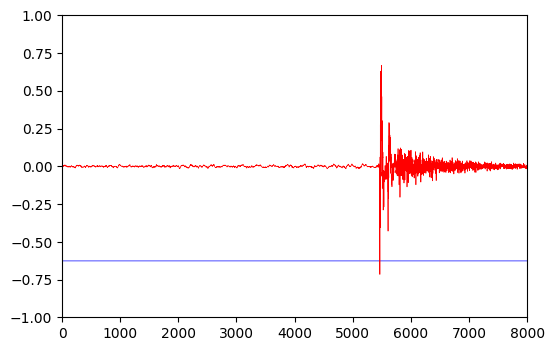

In [42]:
%matplotlib inline
import librosa
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import csv
import torch.nn.functional as F

import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils import data as torchData
import torch.nn.functional as F

#y1,sr1 = librosa.load("./dataset/test_audio/audio_steel_140.wav",sr= 16000)
y1,sr1 = librosa.load("./dataset/train_audio/audio_plastic_13.wav",sr= 16000)
for i in range(1,2):#range(12,0,-1):
    
    audio,sr = librosa.load("./output_test/"+timeText+"_"+str(i)+"_accel_plastic_13.wav", sr =16000)
    fig = plt.figure()

    ax = fig.add_subplot(1,1,1)
    ax.set_xlim([0, 8000])
    ax.set_ylim([-1.0, 1.0])
    ax.plot(audio,color='blue',linewidth = 0.5)
    plt.title('epoch:'+str(13-i))
    plt.show()

    print("Loss :", np.sum(np.power(audio-y1,2))/8000.0)
    
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
 
ax.set_xlim([0, 8000])
ax.set_ylim([-1.0, 1.0])

print (sr)
print(audio)
print(np.var(audio))
print (np.max(audio))
print (np.min(audio))
print (np.mean(audio))

ax.plot(audio,color='blue',linewidth = 0.5)
ax.plot(y1,color = 'red', linewidth = 0.5)

print("Loss :", np.sum(np.power(audio-y1,2))/8000.0)

Loss : 0.393797119140625
Variable containing:
1.00000e-04 *
 1.2478  1.2456  1.2438  ...   1.2463  1.2492  1.2493
[torch.FloatTensor of size 1x8000]

Variable containing:
-8.9872 -8.9872 -8.9872  ...  -8.9872 -8.9872 -8.9872
[torch.FloatTensor of size 1x8000]

Variable containing:
1.00000e-04 *
  4.3938
[torch.FloatTensor of size 1]

Variable containing:
1.00000e-08 *
  5.4922
[torch.FloatTensor of size 1]



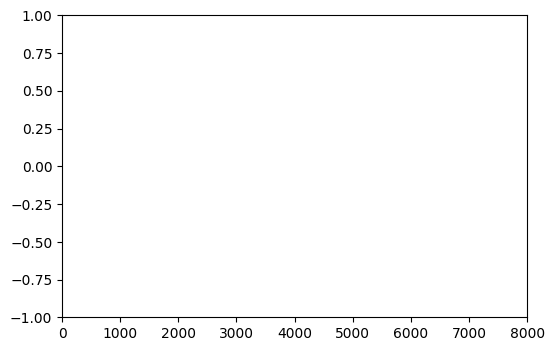

In [6]:
 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlim([0, 8000])
ax.set_ylim([-1.0, 1.0])

y1,sr1 = librosa.load("./dataset/train_audio/audio_plastic_13.wav",sr= 16000)
print("Loss :", np.sum(np.power(audio-y1,2))/8000.0)
y1 = Variable(torch.FloatTensor(y1).view(1,8000))
y1= F.softmax(y1/torch.sum(y1),dim=1)
#y1 = y1.data.numpy()

audio = Variable(torch.FloatTensor(np.array(audio)).view(1,8000))
audio = F.log_softmax(audio/torch.sum(audio),dim=1)

print(y1)
print(audio)
loss1 = nn.KLDivLoss(size_average=False)
loss2 = nn.KLDivLoss(size_average=True)

a = loss1(audio,y1)
print(a)
a = loss2(audio,y1)
print(a)
#ax.plot(y1*10000,color = 'red', linewidth = 1.5)
#plt.show()



[0.27819824 0.2552185  0.25668335 ... 0.2915039  0.2915039  0.2915039 ]
[ 1.4038086e-03  3.5095215e-03  5.1879883e-03 ...  2.8076172e-03
  1.2207031e-04 -3.0517578e-05]
Loss : 0.24854052734375
Loss : 0.06596424865722657
[-0.10682803 -0.10683737 -0.10684671 ... -0.05677574 -0.05677574
 -0.05677574]


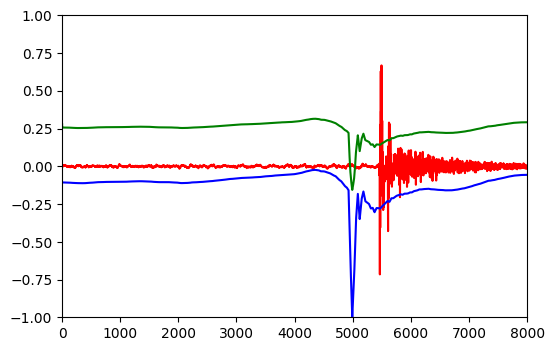

In [57]:
timeText= "1803220742"
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlim([0, 8000])
ax.set_ylim([-1.0, 1.0])

output,sr = librosa.load("./output_test/"+timeText+"_"+str(1)+"_accel_plastic_13.wav", sr =16000)

y1,sr1 = librosa.load("./dataset/train_audio/audio_plastic_13.wav",sr= 16000)

with open(os.path.join("./dataset/accel_8000","accel_plastic_13.csv"), 'r') as csvfile:

            rdr = csv.reader(csvfile)
            data_accel = [line for line in rdr]

            for idx2,each_line in enumerate(data_accel) :

                each_line = [float(i) for i in each_line]
                
                #x,y,z 3 axis -> sum(x,y,z) 1 axis and material property
                sum_3axis = np.sum(each_line[0:2])
                each_line = sum_3axis/10
                data_accel[idx2] = each_line

            data_accel = np.array(data_accel)
#print(np.max(np.abs(data_accel)))
data_accel /= np.max(np.abs(data_accel))
ax.plot(y1,color = 'red', linewidth = 1.5)
ax.plot(data_accel,color='blue', linewidth = 1.5)
ax.plot(output,color='green', linewidth = 1.5)

print("Loss :", np.sum(output-y1)/8000.0)
print("Loss :", np.sum(np.power(output-y1,2))/8000.0)

print(data_accel)
#plt.show()


NameError: name 'torch' is not defined

<Figure size 600x600 with 0 Axes>